# Machine Learning Lab - customer analysis

Activity 6

Processing Data
(Further processing...)
- X-y split.
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

Linear Regression
- Train-test split.
- Apply linear regression.

Model Validation
- Description:
- MSE.
- RMSE.
- MAE.
- R2.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

### Load Data and first cleaning

In [3]:
def load_original_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv" )

In [4]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer","number_of_open_complaints"])
    df=df.dropna()
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [78]:
customers_df= load_original_data()

In [6]:
customers_df.shape

(10910, 26)

In [7]:
customers_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [79]:
customers_df=clean_data(customers_df)

In [80]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 10908
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          6817 non-null   object        
 1   customer_lifetime_value        6817 non-null   float64       
 2   response                       6817 non-null   object        
 3   coverage                       6817 non-null   object        
 4   education                      6817 non-null   object        
 5   effective_to_date              6817 non-null   datetime64[ns]
 6   employmentstatus               6817 non-null   object        
 7   gender                         6817 non-null   object        
 8   income                         6817 non-null   int64         
 9   location_code                  6817 non-null   object        
 10  marital_status                 6817 non-null   object        
 11  monthly_premium_

## Second cleaning: categorical columns

### We aggregate some of the categorical columns

In [81]:

#We aggregate the education column to three new colmns: College+High School, Bachelor, Master+Doctor
def education_clean(value):
    
    dict_ed = {"Master":"Master", "Bachelor": "Bachelor", 
               "College": "College", "High School or Below": "College", "Doctor": "Master"}
    
    return dict_ed[value]
    
customers_df["education"] = customers_df["education"].apply(education_clean)
print(customers_df["education"].value_counts())

College     3842
Bachelor    2037
Master       938
Name: education, dtype: int64


In [82]:
#We aggregate the luxury car and the luxury Suv in the vehicle class column


customers_df.loc[customers_df["vehicle_class"].apply(lambda x: x.startswith("Luxury")), "vehicle_class"] = "Luxury"

customers_df["vehicle_class"].value_counts()


Four-Door Car    3465
Two-Door Car     1433
SUV              1306
Sports Car        355
Luxury            258
Name: vehicle_class, dtype: int64

In [83]:
#We drop the month column since it is not really informative:
customers_df.drop(columns="month", inplace=True)

# Plotting

EDA Catgorical Columns 

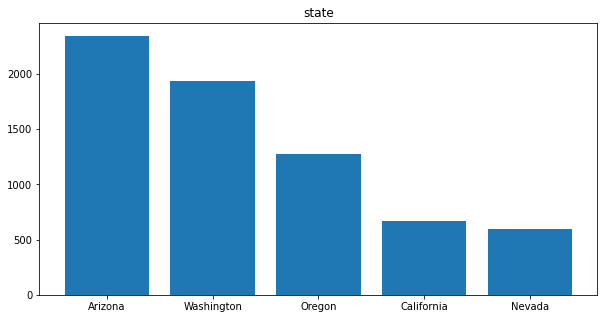

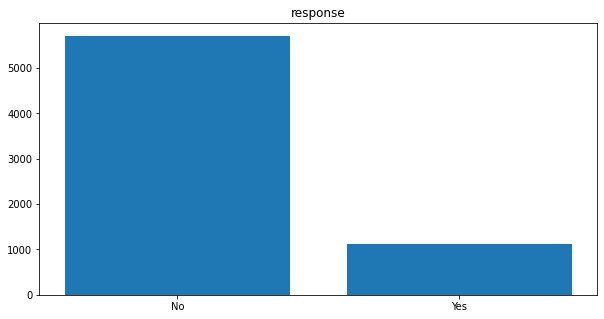

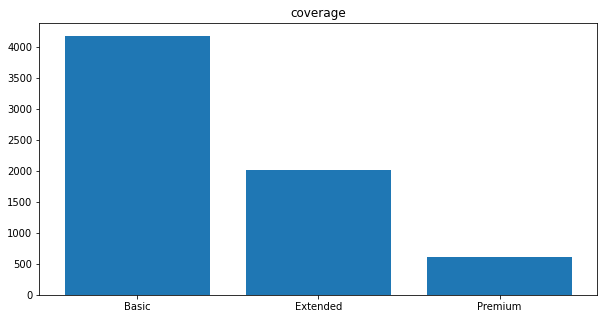

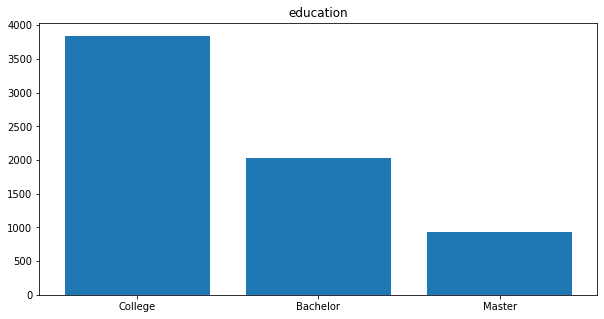

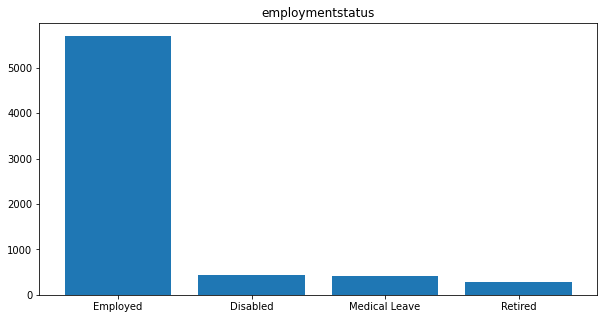

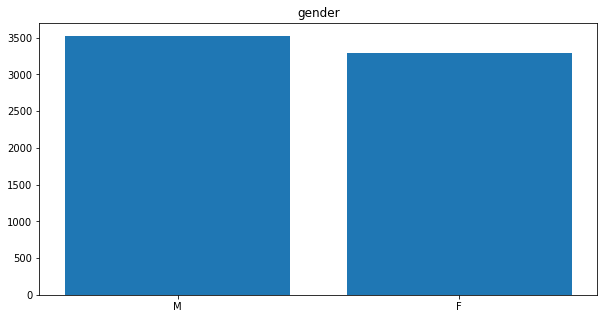

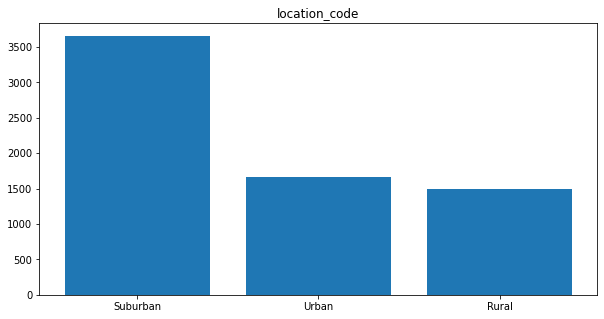

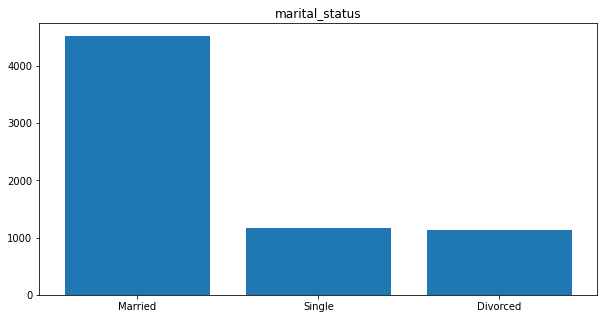

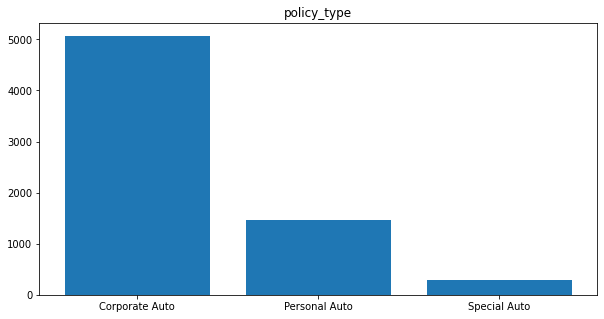

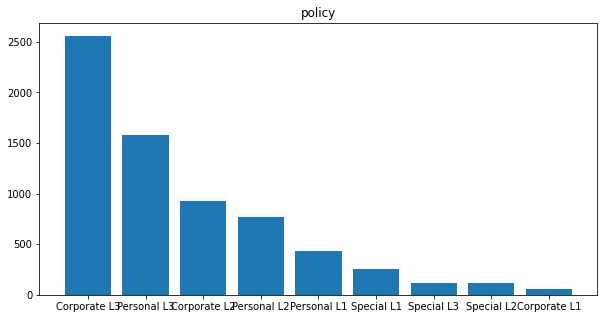

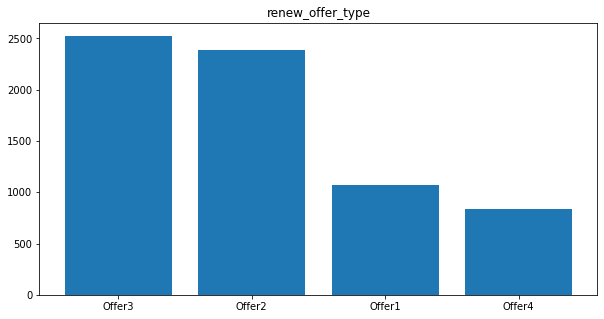

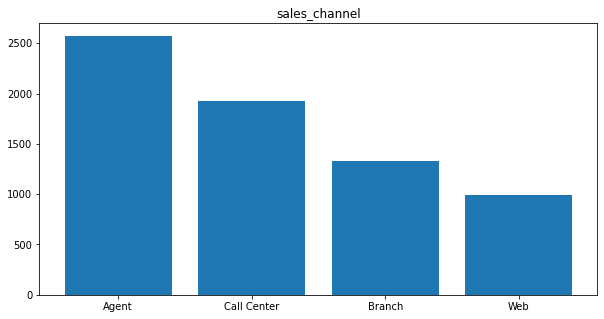

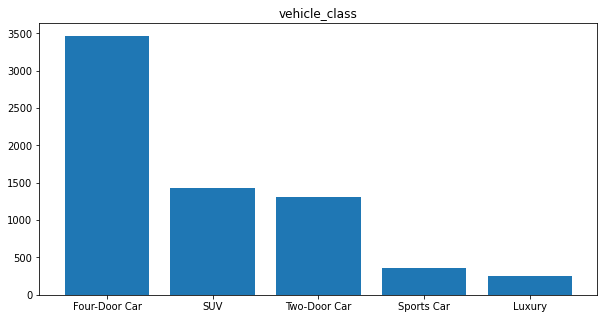

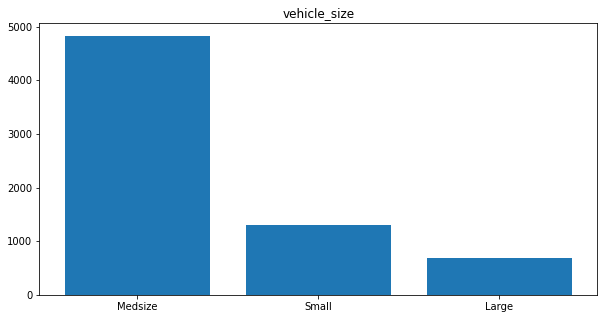

In [84]:
for c in customers_df.select_dtypes(include=["object"]):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

### Show a plot of the response rate by the sales channel.

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


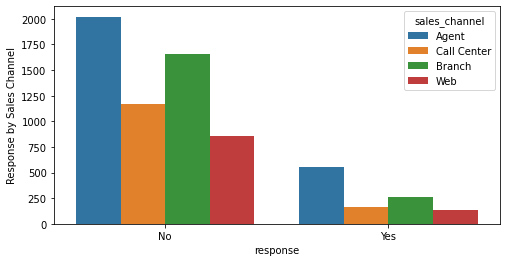

In [85]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()


### Show a plot of the response by the offer type

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


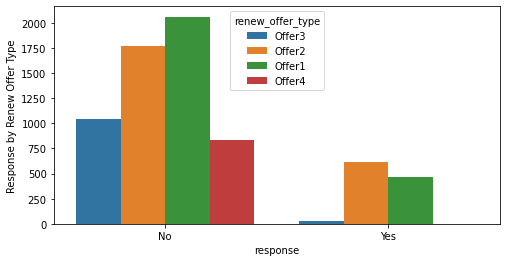

In [88]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='renew_offer_type', data=customers_df)
plt.ylabel('Response by Renew Offer Type')
plt.show()

### Show a plot of the response rate by the total claim amount.


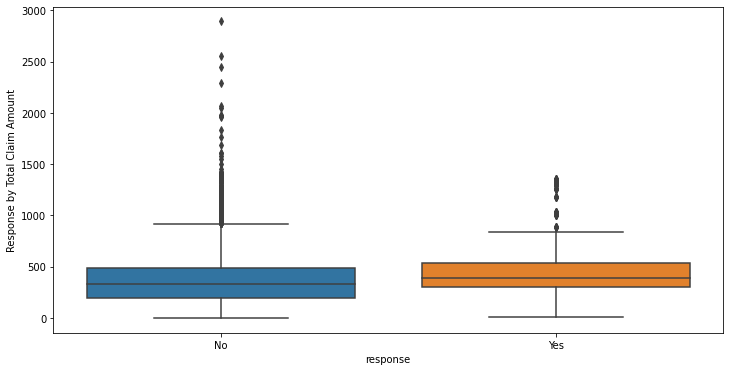

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()


### Show a plot of the response rate by income.


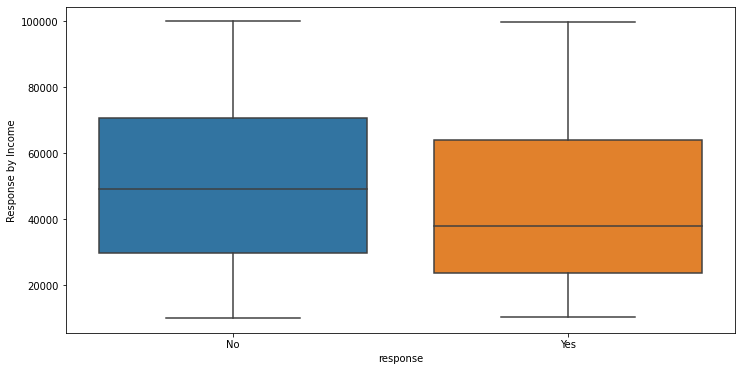

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

# Data Transformation Lab

#### Check normality visually.

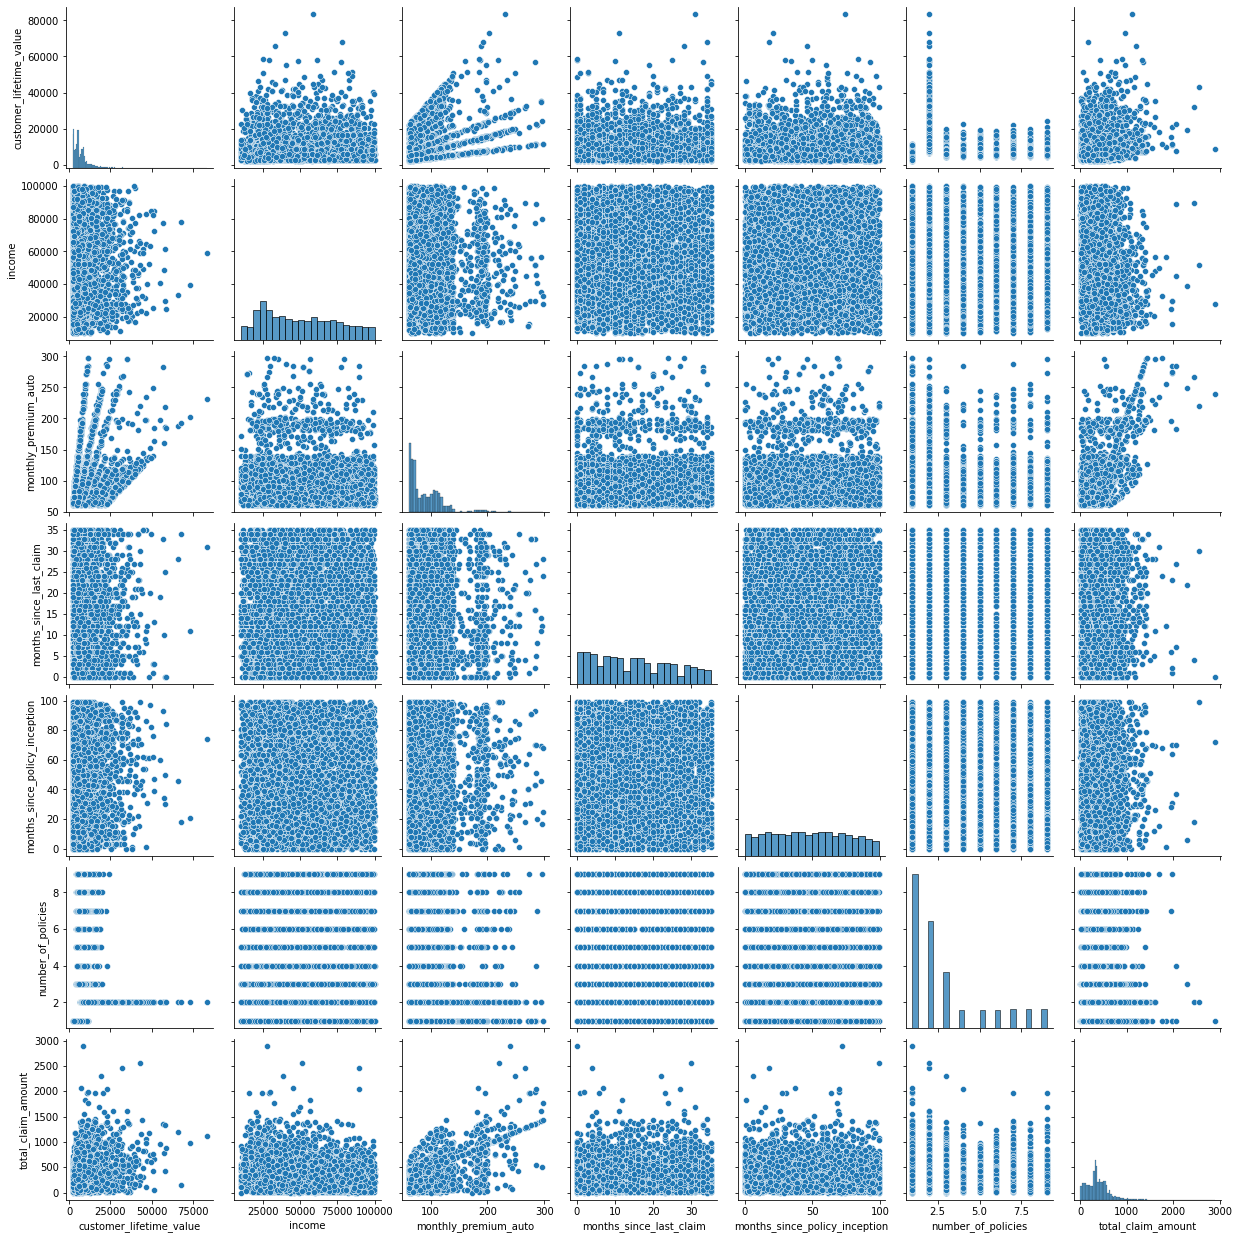

In [91]:
sns.pairplot(customers_df)
plt.show()

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

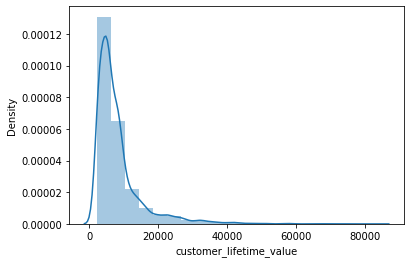

In [92]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

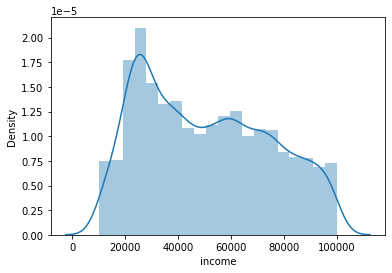

In [93]:
sns.distplot((customers_df['income']), bins=20)

In [94]:
monthly=boxcox(customers_df['customer_lifetime_value'],lmbda=0.02)

<AxesSubplot:ylabel='Count'>

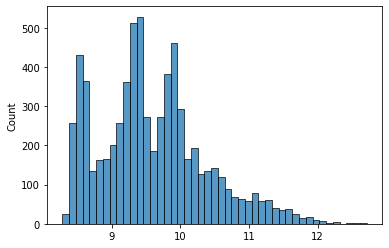

In [95]:
sns.histplot(monthly)

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

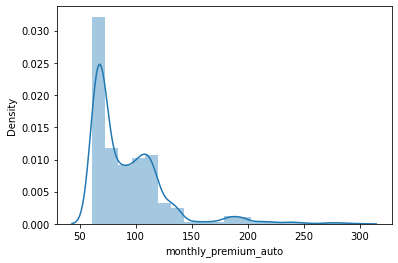

In [96]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

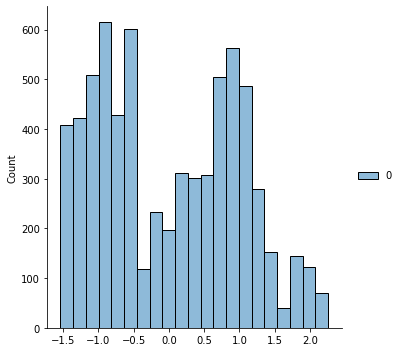

In [97]:
pt = PowerTransformer()
monthly=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

-1.4825857701289176


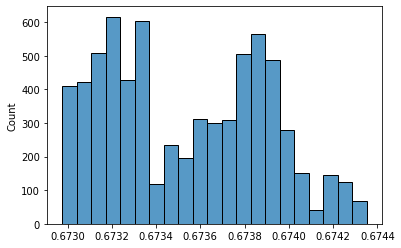

In [98]:
monthly,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly)
print(lam)

<AxesSubplot:ylabel='Count'>

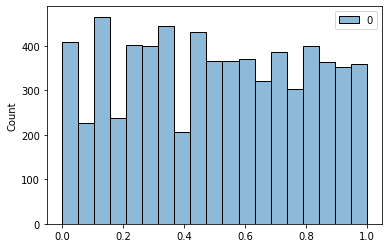

In [99]:
qt = QuantileTransformer()
monthly=qt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

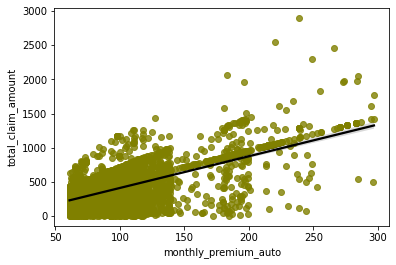

In [102]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', 
            data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='income', ylabel='customer_lifetime_value'>

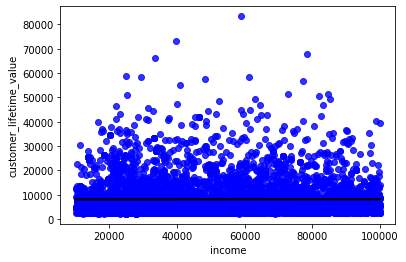

In [103]:
sns.regplot(x='income',y='customer_lifetime_value', 
            data=customers_df, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.002916   
income                                        0.002916  1.000000   
monthly_premium_auto                          0.399491 -0.012372   
months_since_last_claim                       0.018531 -0.034453   
months_since_policy_inception                 0.011275  0.015799   
number_of_policies                            0.022683 -0.001324   
total_claim_amount                            0.245436 -0.221917   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.399491                 0.018531   
income                                    -0.012372                -0.034453   
monthly_premium_auto                       1.000000                 0.005887   
months_since_last_claim                    0.005887                 1.000000   
months_since_policy_inception              0.020112    

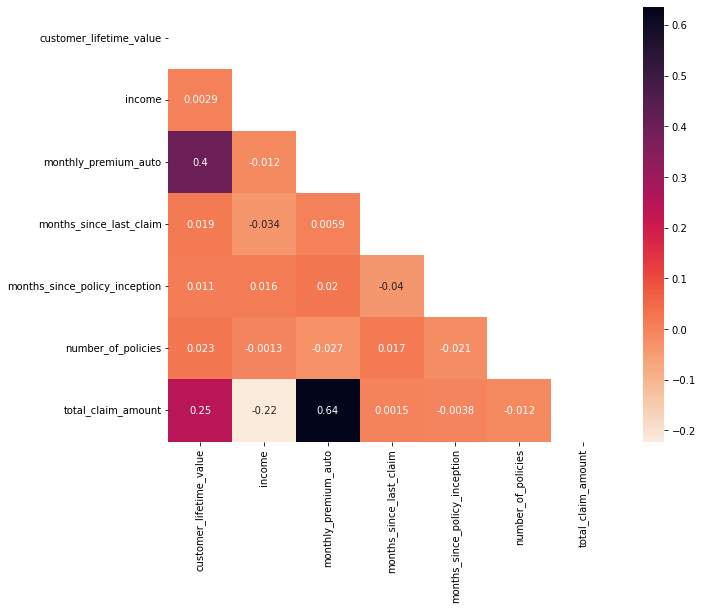

In [109]:
numericals_features = customers_df.select_dtypes(include=np.number)
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

X-Y split  
splitting the target variable from the dependent variables

In [112]:
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])
y

0        293.0
2        480.0
3        484.0
6        288.0
7        247.0
         ...  
10902    655.0
10903    355.0
10906    273.0
10907    381.0
10908    618.0
Name: total_claim_amount, Length: 6817, dtype: float64

Get the numeric data.

In [113]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809.0,48029,61,7.0,52,9
2,14948.0,22139,100,34.0,31,2
3,22332.0,49078,97,10.0,3,2
6,5035.0,37405,63,8.0,99,4
7,4956.0,87197,63,35.0,45,3


In [166]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.234707,50456.580461,92.963034,15.046941,47.832624,2.951005
std,6949.068193,24305.956566,34.615160,10.064762,27.895350,2.390613
min,2120.000000,10037.000000,61.000000,0.000000,0.000000,1.000000
25%,4091.000000,28432.000000,68.000000,6.000000,24.000000,1.000000
50%,5811.000000,48081.000000,83.000000,14.000000,48.000000,2.000000
75%,9076.000000,70187.000000,109.000000,23.000000,71.000000,4.000000
max,83325.000000,99981.000000,297.000000,35.000000,99.000000,9.000000


#### Normalize

In [47]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [167]:
X_scaled=StandardScaler().fit_transform(numericals_features)
X_scaled.shape

(6817, 6)

Get Categorical data

In [168]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,February
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,January
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,February
7,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,February


### Categorical Variables Transformation

One Hot Encoding

In [200]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [201]:

all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month_January
0,4809.0,48029,61,7.0,52,9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,14948.0,22139,100,34.0,31,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,22332.0,49078,97,10.0,3,2,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
6,5035.0,37405,63,8.0,99,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
7,4956.0,87197,63,35.0,45,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


### Train Test Split

In [204]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [205]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month_January
1256,3703.0,33738,95,13.0,97,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
10782,5013.0,65165,126,14.0,18,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4862,7155.0,76506,89,35.0,65,8,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
8122,2454.0,74624,62,16.0,71,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
9230,5008.0,51523,62,31.0,0,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9258,3707.0,16476,101,29.0,25,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2116,2854.0,71126,71,11.0,72,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
3977,8723.0,25680,73,10.0,93,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1709,4084.0,13483,107,9.0,60,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


### Apply Linear Regression

In [236]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

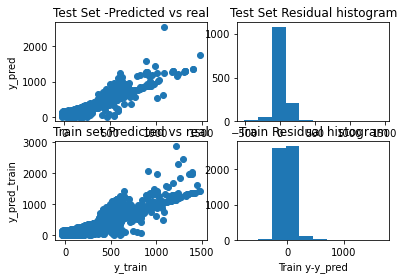

In [255]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

#### Model Validation

MSE.

In [237]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.to_numpy()), y_train)
test_mse=mse(model.predict(X_test.to_numpy()), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 12606.539804808053 -- test MSE: 12329.640184549426


RMSE.

In [238]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 112.2788484301832 -- test RMSE: 111.0389129294295


MAE.

In [239]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.to_numpy()), y_train)
test_mae=mae(model.predict(X_test.to_numpy()), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 12606.539804808053 -- test MAE: 12329.640184549426


R2.

In [240]:
r2= model.score(X_test.to_numpy(), y_test)

In [241]:

print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 0.803375872860121 -- test R2: 0.8031656929497641


adjusted rsquare

In [230]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8031295831887937


#### Feature Importance

In [244]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [245]:
features_importances

,Attribute,Importance
0,customer_lifetime_value,0.000308
25,policy_type_Personal Auto,0.000308
27,policy_Corporate L2,0.000308
28,policy_Corporate L3,0.000308
29,policy_Personal L1,0.000308
30,policy_Personal L2,0.000308
31,policy_Personal L3,0.000308
32,policy_Special L1,0.000308
33,policy_Special L2,0.000308
34,policy_Special L3,0.000308


In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()